In [1]:
#Imorting Dependencies
#seaborn will be my style 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

import datetime as dt

# Reflect Tables into SQLAlchemy ORM
    #Python SQL toolkit and Pbject Relational Mapper 
#automap_base allows you to reflect the database and make a declarative base 
import sqlalchemy 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
#Create_engine The Engine is the starting point for any SQLAlchemy application. It’s “home base” for the actual database and its DBAPI,
from sqlalchemy import create_engine, func
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey

In [2]:
#Charting experience 
#This will give ,e my style and colors for plotting my graphs 
palette = sns.husl_palette(10)
sns.set(style='darkgrid',palette=palette)

hex_codes = palette.as_hex()
palette_dict = {'light coral':hex_codes[0], 
                'orange':hex_codes[1], 
                'goldenrod':hex_codes[2], 
                'olive green':hex_codes[3], 
                'emerald':hex_codes[4], 
                'teal':hex_codes[5], 
                'cerulean':hex_codes[6], 
                'steel blue':hex_codes[7], 
                'lilac':hex_codes[8], 
                'pink':hex_codes[9]}

In [3]:
#Creating the engine to connect with the dataset hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')
#In the most general sense, the Session establishes all conversations with the database and represents a “holding zone” 
#for all the objects which you’ve loaded or associated with it during its lifespan.
# It provides the entrypoint to acquire a Query object,\
# which sends queries to the database using the Session object’s current database connection,
session = Session(engine)

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
#using prepare we are asking it to reflect the schema(engine) and produce mappings:
Base.prepare(engine,reflect=True)

In [5]:

Base.classes.keys()

['measurement', 'station']

In [6]:
measurement = Base.classes.measurement
station = Base.classes.station

# Exploratory Climate Analysis

In [7]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [8]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
    
    
#this will get the last date in the table
l_date = session.query(measurement.date).order_by(measurement.date.desc()).first()


# Calculate the date 1 year ago from the last data point in the database
    # Now getting the date 365 days ago(12 months)/used timedelta to show the difference between the dates 
l_year = dt.date(2017, 8, 23)- dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
#Now selecting only the date and prcp values within the last year starting on 2016-08-23 through 2017-08-23

prcp_values = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > l_year).\
    order_by(measurement.date).all()


#tring to use the code below to get the xticks the dates 
#date = prcp_df['date'].dt.strftime('%y-%m-%d')


In [9]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_values)
# Sort the dataframe by date
prcp_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


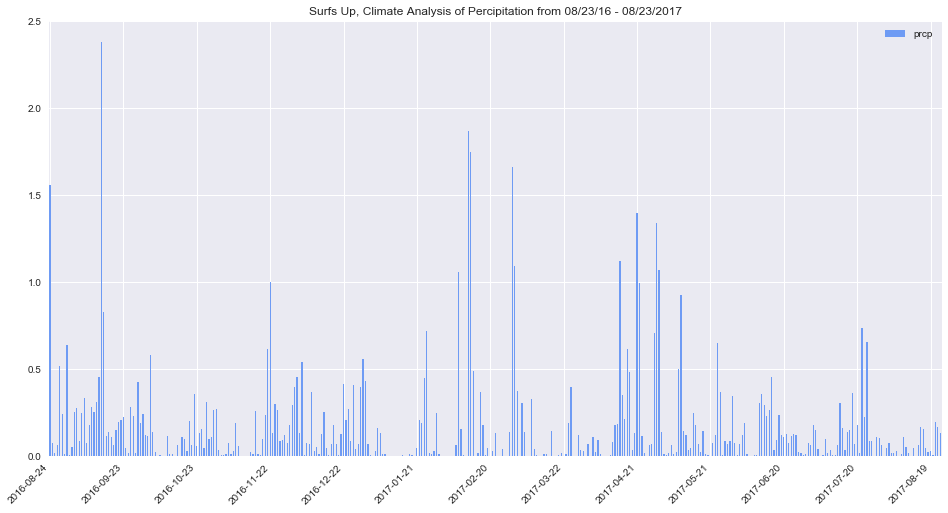

In [10]:
plt.rcParams['figure.figsize'] = [16,8]

prcp_df_date = prcp_df.groupby('date').mean().reset_index()
prcp_df_date.plot.bar(color=palette_dict['steel blue'])
plt.title('Surfs Up, Climate Analysis of Percipitation from 08/23/16 - 08/23/2017')

plt.xticks([x*30 for x in np.arange(13)],
          [list(prcp_df_date['date'])[x*30] for x in np.arange(13)],
          rotation=45, horizontalalignment='right')
plt.show()

In [11]:
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# # Use Pandas Plotting with Matplotlib to plot the data
# prcp_df.plot('date','prcp')
# plt.xlabel('Date')
# plt.ylabel('Percipitation in Inches')
# plt.title('Surfs Up, Climate Analysis of Percipitation from 08/23/16 - 08/23/2017')
# plt.legend(['Precipitation'])
# plt.xticks(rotation=35)
# plt.tight_layout()
# plt.show()

In [13]:
#Use Pandas to print the summary statistics for the precipitation data.
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [14]:
query = 'SELECT m.station,s.name,COUNT(m.tobs) as "The Count of Observation"\
    from measurement m JOIN station s  ON m.station = s.station\
    GROUP BY m.station ORDER BY COUNT(m.tobs) DESC'
s_obs_count = pd.read_sql(query,engine)
b_station = pd.DataFrame(s_obs_count)

In [15]:

highest_obs = f'{b_station["station"][0]} {b_station["name"][0]}'

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

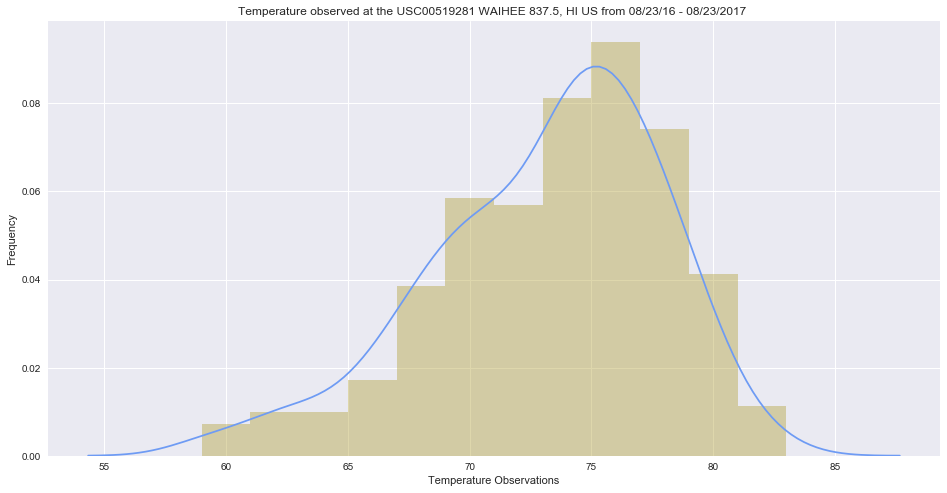

In [16]:
query = f'SELECT date, station, tobs FROM measurement\
    WHERE date > "{l_year}" AND \
    station = "{b_station["station"][0]}"'

l_year_station = pd.read_sql(query,engine)['tobs']

sns.distplot(l_year_station, bins=12, color=palette_dict['steel blue'],
            hist_kws={'color':palette_dict['goldenrod']})

plt.title(f'Temperature observed at the {highest_obs} from 08/23/16 - 08/23/2017 ')
plt.xlabel('Temperature Observations')
plt.ylabel('Frequency')

In [17]:
print(b_station)

       station                                    name  \
0  USC00519281                     WAIHEE 837.5, HI US   
1  USC00519397                    WAIKIKI 717.2, HI US   
2  USC00513117                    KANEOHE 838.1, HI US   
3  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US   
4  USC00516128            MANOA LYON ARBO 785.2, HI US   
5  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US   
6  USC00511918       HONOLULU OBSERVATORY 702.2, HI US   
7  USC00517948                       PEARL CITY, HI US   
8  USC00518838              UPPER WAHIAWA 874.3, HI US   

   The Count of Observation  
0                      2772  
1                      2724  
2                      2709  
3                      2669  
4                      2612  
5                      2202  
6                      1979  
7                      1372  
8                       511  
